<a href="https://www.kaggle.com/code/pradhicksancm/model-performance-analysis?scriptVersionId=216634746" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing Modules

In [1]:
pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 22.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
import shutil

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Preparing images for anlaysis

In [3]:
folder_path = '/kaggle/input/model-performance-analysis-cars-dataset/model performance analysis - cars dataset'
images_path_list = os.listdir(folder_path)
images_path_list = [folder_path + f'/{image_path}' for image_path in images_path_list]
images_path_list

['/kaggle/input/model-performance-analysis-cars-dataset/model performance analysis - cars dataset/occ_l1.webp',
 '/kaggle/input/model-performance-analysis-cars-dataset/model performance analysis - cars dataset/on_road.jpg',
 '/kaggle/input/model-performance-analysis-cars-dataset/model performance analysis - cars dataset/top_view.jpeg',
 '/kaggle/input/model-performance-analysis-cars-dataset/model performance analysis - cars dataset/front_view.jpeg',
 '/kaggle/input/model-performance-analysis-cars-dataset/model performance analysis - cars dataset/occ_l2.jpg',
 '/kaggle/input/model-performance-analysis-cars-dataset/model performance analysis - cars dataset/side_view.jpeg',
 '/kaggle/input/model-performance-analysis-cars-dataset/model performance analysis - cars dataset/occ_l3.jpg',
 '/kaggle/input/model-performance-analysis-cars-dataset/model performance analysis - cars dataset/back_view.jpeg',
 '/kaggle/input/model-performance-analysis-cars-dataset/model performance analysis - cars data

In [4]:
images_list = [ mpimg.imread(image_path) for image_path in images_path_list]

## Loading the models

In [5]:
model = YOLO('yolov8l.pt') # model without finetuning
model_ft1 = YOLO('/kaggle/input/custom-trained-car-detecting-yolo-v8-1/pytorch/default/1/best.pt') # finetuned with one datset
model_ft2 = YOLO('/kaggle/input/custom-trained-car-detecting-yolo-v8-2/pytorch/default/1/best.pt') # model finetuned with two datasets

100%|██████████| 83.7M/83.7M [00:00<00:00, 103MB/s]


In [6]:
results = model.track(images_path_list, save=True)
results_1 = model_ft1.track(images_path_list, save=True)
results_2 = model_ft2.track(images_path_list, save=True)

requirements: Ultralytics requirement ['lap>=0.5.12'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.4s, installed 1 package: ['lap>=0.5.12']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


0: 640x640 2 cars, 2029.9ms
1: 640x640 1 car, 2029.9ms
2: 640x640 1 refrigerator, 1 vase, 2029.9ms
3: 640x640 1 car, 2029.9ms
4: 640x640 5 cars, 4 trucks, 2029.9ms
5: 640x640 1 car, 2029.9ms
6: 640x640 1 person, 8 cars, 1 motorcycle, 2029.9ms
7: 640x640 1 car, 2029.9ms
8: 640x640 1 person, 21 cars, 1 motorcycle, 1 truck, 2029.9ms
Speed: 8.2ms preprocess, 2029.9ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/track

0: 640x640 1 car, 1904.1ms
1: 640x640 1 car, 1904.1ms
2: 640x640 2 cars, 1904.1ms
3: 640x640 1 car, 1904.1ms
4: 640x640 3 cars, 1904.1ms
5: 640x640 1 car, 1904.1ms
6: 640x640 3 cars, 1904.1ms
7: 640x640 1 car

## Analysing performances of various models

### Images with no Occlusion

In [7]:
model_front_view = mpimg.imread('/kaggle/working/runs/detect/track/front_view.jpg')
model_ft1_front_view = mpimg.imread('/kaggle/working/runs/detect/track2/front_view.jpg')
model_ft2_front_view = mpimg.imread('/kaggle/working/runs/detect/track3/front_view.jpg')

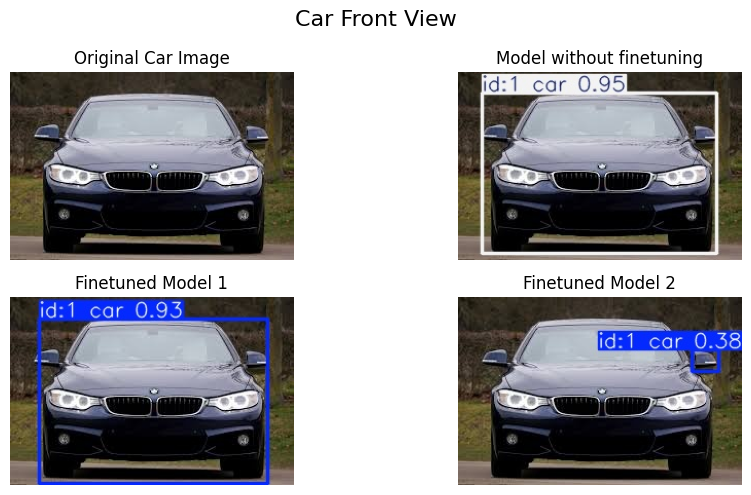

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0,0].imshow(images_list[3])
axes[0,0].axis('off')  
axes[0,0].set_title('Original Car Image') 

axes[0,1].imshow(model_front_view)
axes[0,1].axis('off')
axes[0,1].set_title('Model without finetuning')

axes[1, 0].imshow(model_ft1_front_view)
axes[1, 0].axis('off')
axes[1, 0].set_title('Finetuned Model 1')

axes[1, 1].imshow(model_ft2_front_view)
axes[1, 1].axis('off')
axes[1, 1].set_title('Finetuned Model 2')

fig.suptitle('Car Front View', fontsize=16)

plt.tight_layout()
plt.show()

In [9]:
model_back_view = mpimg.imread('/kaggle/working/runs/detect/track/back_view.jpg')
model_ft1_back_view = mpimg.imread('/kaggle/working/runs/detect/track2/back_view.jpg')
model_ft2_back_view = mpimg.imread('/kaggle/working/runs/detect/track3/back_view.jpg')

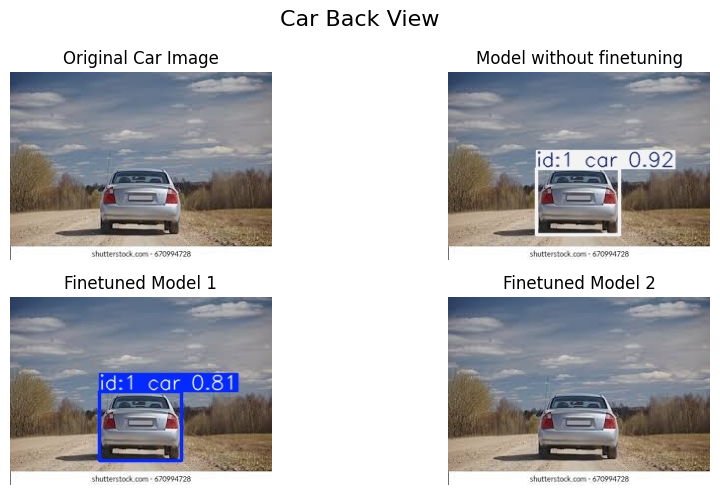

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0,0].imshow(images_list[7])
axes[0,0].axis('off')  
axes[0,0].set_title('Original Car Image') 

axes[0,1].imshow(model_back_view)
axes[0,1].axis('off')
axes[0,1].set_title('Model without finetuning')

axes[1, 0].imshow(model_ft1_back_view)
axes[1, 0].axis('off')
axes[1, 0].set_title('Finetuned Model 1')

axes[1, 1].imshow(model_ft2_back_view)
axes[1, 1].axis('off')
axes[1, 1].set_title('Finetuned Model 2')

fig.suptitle('Car Back View', fontsize=16)

plt.tight_layout()
plt.show()

In [11]:
model_side_view = mpimg.imread('/kaggle/working/runs/detect/track/side_view.jpg')
model_ft1_side_view = mpimg.imread('/kaggle/working/runs/detect/track2/side_view.jpg')
model_ft2_side_view = mpimg.imread('/kaggle/working/runs/detect/track3/side_view.jpg')

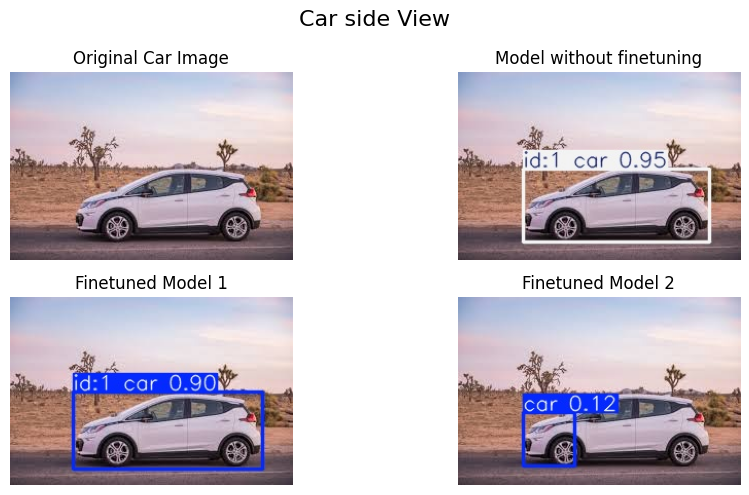

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0,0].imshow(images_list[5])
axes[0,0].axis('off')  
axes[0,0].set_title('Original Car Image') 

axes[0,1].imshow(model_side_view)
axes[0,1].axis('off')
axes[0,1].set_title('Model without finetuning')

axes[1, 0].imshow(model_ft1_side_view)
axes[1, 0].axis('off')
axes[1, 0].set_title('Finetuned Model 1')

axes[1, 1].imshow(model_ft2_side_view)
axes[1, 1].axis('off')
axes[1, 1].set_title('Finetuned Model 2')

fig.suptitle('Car side View', fontsize=16)

plt.tight_layout()
plt.show()

In [13]:
model_on_road = mpimg.imread('/kaggle/working/runs/detect/track/on_road.jpg')
model_ft1_on_road = mpimg.imread('/kaggle/working/runs/detect/track2/on_road.jpg')
model_ft2_on_road = mpimg.imread('/kaggle/working/runs/detect/track3/on_road.jpg')

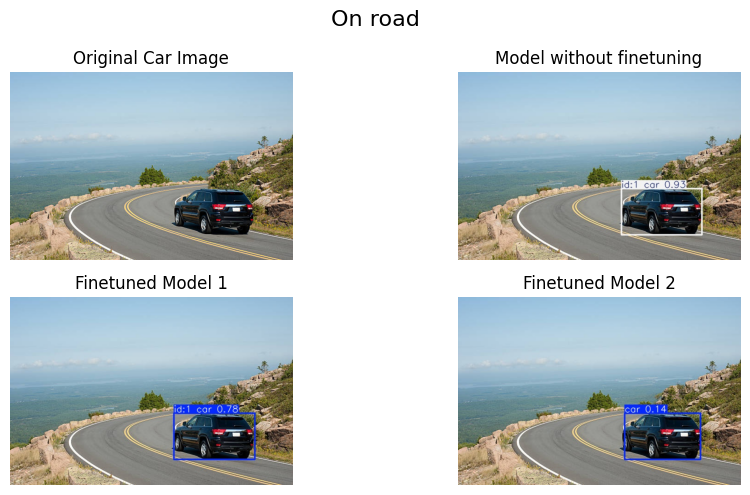

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0,0].imshow(images_list[1])
axes[0,0].axis('off')  
axes[0,0].set_title('Original Car Image') 

axes[0,1].imshow(model_on_road)
axes[0,1].axis('off')
axes[0,1].set_title('Model without finetuning')

axes[1, 0].imshow(model_ft1_on_road)
axes[1, 0].axis('off')
axes[1, 0].set_title('Finetuned Model 1')

axes[1, 1].imshow(model_ft2_on_road)
axes[1, 1].axis('off')
axes[1, 1].set_title('Finetuned Model 2')

fig.suptitle('On road', fontsize=16)

plt.tight_layout()
plt.show()

### Images with Occlusion

In [15]:
model_occ_l3 = mpimg.imread('/kaggle/working/runs/detect/track/occ_l3.jpg')
model_ft1_occ_l3 = mpimg.imread('/kaggle/working/runs/detect/track2/occ_l3.jpg')
model_ft2_occ_l3 = mpimg.imread('/kaggle/working/runs/detect/track3/occ_l3.jpg')

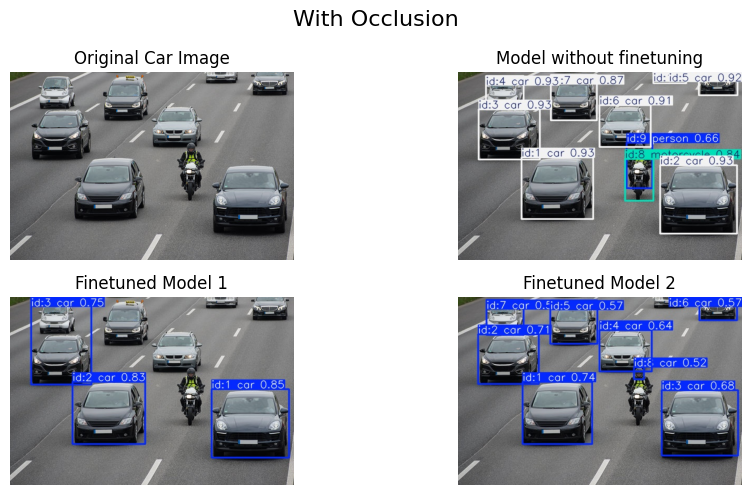

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0,0].imshow(images_list[6])
axes[0,0].axis('off')  
axes[0,0].set_title('Original Car Image') 

axes[0,1].imshow(model_occ_l3)
axes[0,1].axis('off')
axes[0,1].set_title('Model without finetuning')

axes[1, 0].imshow(model_ft1_occ_l3)
axes[1, 0].axis('off')
axes[1, 0].set_title('Finetuned Model 1')

axes[1, 1].imshow(model_ft2_occ_l3)
axes[1, 1].axis('off')
axes[1, 1].set_title('Finetuned Model 2')

fig.suptitle('With Occlusion', fontsize=16)

plt.tight_layout()
plt.show()